In [17]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from string import punctuation

from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import os
import glob
import codecs
from collections import Counter
import re
import string
import pandas as pd 
import collections 
import matplotlib.pyplot as plt

In [18]:
def sentence_similarity(sent1, sent2):
    
    stop_words = set(stopwords.words('english'))
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stop_words:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stop_words:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [19]:
def similarmatrix(sentences):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2])
            #print(similarity_matrix)
    return similarity_matrix


In [20]:


def format_function(data):
# replace citation with <cit> tag
	data = re.sub(r'[[][0-9]+[,0-9/-]*[]]',r' <cit> ',data)
	data = re.sub(r'[[][0-9]+[", ",0-9/-]*[]]',r' <cit> ',data)
	data = re.sub("<.*?>", "", data)
# remove text in brackets
	data = re.sub(r'\([^)]+\)','',data)
	data = re.sub(r'\[.*?\]','',data)
	data = re.sub("\n",'',data)


# remove table and figures
	data = re.sub(r'\ntable \d+.*?\n',r'',data)
	data = re.sub(r'.*\t.*?\n',r'',data)
	data = re.sub(r'\nfigure \d+.*?\n',r'',data)
	data = re.sub(r'[(]fig. \d+.*?[)]',r'',data)
	data = re.sub(r'[(]fig . \d+.*?[)]',r'',data)
	data = re.sub(r'[(]table \d+.*?[)]',r'',data)
	return str(data)

In [21]:
def summarizedoc(doc, n):
      
          """
           Return a list of n sentences 
           which represent the summary of text.
          """
          summarize_text = []
          #Splitting the artice into sentences
          #text_result = re.sub("<.*?>", "", str(doc))
          text_result = format_function(str(doc))
          #print(text_result)
          sents = sent_tokenize(text_result)
          #assert n <= len(sents)
            
          # Generate Similary Martix across sentences
          sent_similarity_matrix = similarmatrix(sents)
        
          G = nx.Graph(sent_similarity_matrix)
          scores = nx.pagerank(G, alpha=0.85)
          
          

         # Sort the rank and pick top sentences
          ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sents)), reverse=True) 
          
         
                
          #print("Indexes of top ranked_sentence order are ", ranked_sentence)    

          for i in range(5):
            
            summarize_text.append((ranked_sentence[i][1]))

          #  output the summarary
          print("Summarize Text: \n", "".join(summarize_text))
         
         
          return summarize_text
   


In [22]:
listfiles=[]
doc1 = ""
summary = []
dir = "text\\"
filename = " "

textfile = input("Enter Textfile that needs to be Summarized   ")
filename =  dir+textfile

file = open(filename, "r")

if ( file != None ):
    listfiles = file.read()
    file.close()
listfiles = "".join(listfiles)



textlist = listfiles.replace("BACKGROUND","")
textlist1 = textlist.replace("RESULTS","")
textlist2=textlist1.replace("CONCLUSIONS","")
textl = textlist2.replace('\n', '')
joinlist = textl.replace('\n', '')
summarize_text = summarizedoc(joinlist,5) 


#To Read Corresponding Summary file  from  the dataset 

summaryfile = textfile.replace("text","abstract")
dir = "abstract\\"
sumfilename = dir+summaryfile
sfile = open(sumfilename, "r")
if ( sfile != None ):
    sumlistfile = sfile.read()
    sfile.close()
sumlist1=[]
sumlist=[]
sumlist2=[]
sumlistfiles = "".join(sumlistfile)
sumlist = sumlistfiles.replace("BACKGROUND","")
sumlist1 = sumlist.replace("RESULTS","")
sumlist2=sumlist1.replace("CONCLUSIONS","")
suml = sumlist2.replace('\n', '')






Enter Textfile that needs to be Summarized   text_10.txt
Summarize Text: 
 expression of lipoprotein lipase was increased in the high dose groups from day    and this is also the time point at which changes in the lipid species present were first detected by gc-ms. because of the relative low spinning speeds used during hrmas 1h nmr spectroscopy, the technique focuses on the detection of lipids with some mobility, and hence the increased lipid detected in the spectra reflect the mobilization of triglyceride stores within the liver tissue.direct infusion mass spectrometry provided an important tool for rationalising the total lipid changes detected by gc-ms and hrmas 1h nmr spectroscopy.its induction in the liver of rats exposed to pb may be responsible for the decrease in plasma lipids, suggesting that the liver in these animals has an increased demand for fatty acids, possibly due to the proliferation in endoplasmic reticulum which is known to be induced by pb   .high resolution 1h-nm

[{'rouge-1': {'f': 0.3603305738238646, 'p': 0.28835978835978837, 'r': 0.4801762114537445}, 'rouge-2': {'f': 0.08955223411950775, 'p': 0.07161803713527852, 'r': 0.11946902654867257}, 'rouge-l': {'f': 0.3292682877305176, 'p': 0.3, 'r': 0.36486486486486486}}]
         F-Measure  Precision    Recall
rouge-1   0.360331   0.288360  0.480176
rouge-2   0.089552   0.071618  0.119469
rouge-l   0.329268   0.300000  0.364865


Text(0.5, 1.0, ' Document Summarizer : Rouge-Metric')

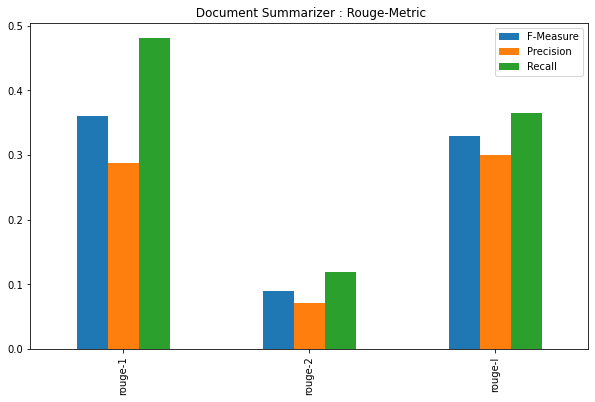

In [24]:
from rouge import Rouge 


sorelist = []
hypothesis = summarize_text
reference = suml
rouge = Rouge()
#scores = rougeEvaluationScore(str(hypothesis), str(reference))
scores = rouge.get_scores(str(hypothesis), str(reference))
print(scores)
scores1=scores[0]
keypoint = scores1.keys()
data1=list(scores1.values())

df = pd.DataFrame(index = keypoint,columns=['f', 'p', 'r'], data=data1)
df.rename(columns = {'f':'F-Measure', 'p':'Precision','r':'Recall'}, inplace = True)
print(df)

plt.rcParams['figure.figsize'] = [10,6]

df.plot.bar()
plt.title(" Document Summarizer : Rouge-Metric")